In [1]:
#!pip install changefinder

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import datetime
import changefinder

In [3]:
import zipfile
with zipfile.ZipFile("step2-output-cleaned.zip","r") as zip_ref:
    zip_ref.extractall("")

# import the tidy data from the Step #2
df=pd.read_csv('step2-output-cleaned.csv')

In [4]:
df.shape

(219521, 53)

In [5]:
# Let's convert the data type of timestamp column to datatime format
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

In [6]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df["machine_status"] = lb_make.fit_transform(df["machine_status"])
df.head()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
date,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,1
2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,1
2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,1
2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,1
2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,1


In [7]:
def findChangePoints(ts, r, order, smooth):
    '''
       r: Discounting rate
       order: AR model order
       smooth: smoothing window size T
    '''
    cf = changefinder.ChangeFinder(r=r, order=order, smooth=smooth)
    ts_score = [cf.update(p) for p in ts]
    plt.figure(figsize=(16,4))
    plt.plot(ts)
    plt.figure(figsize=(16,4))
    plt.plot(ts_score, color='red')
    return(ts_score)

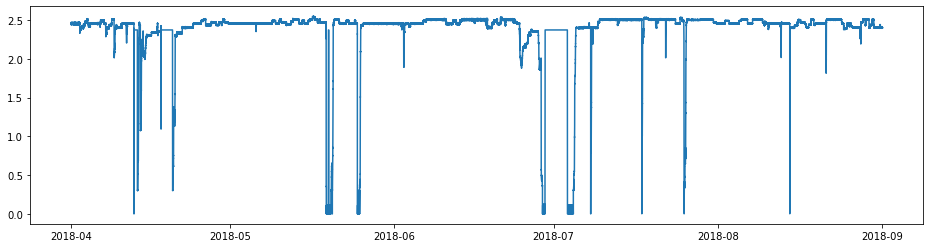

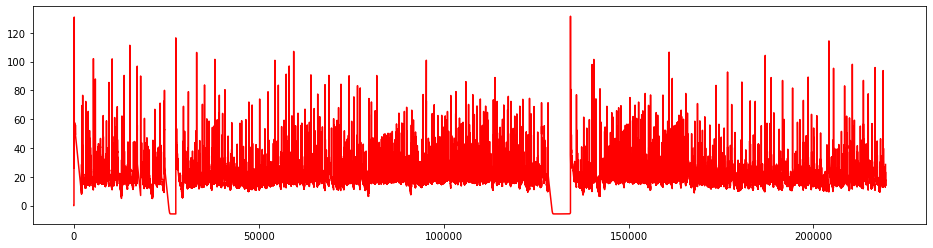

In [8]:
ts_score1 = findChangePoints(df['sensor_00'], r = 0.01, order = 3, smooth = 10)

In [9]:
ts_change_loc1 = pd.Series(ts_score1).nlargest(20)
ts_change_loc1 = ts_change_loc1.index
ts_change_loc1

Int64Index([134307,     95,     94,     93,     92,     19,  27562, 204209,
                75, 134306,     74,  15120,  15118, 204210,  15119, 204211,
             59444, 160979,  33196, 160977],
           dtype='int64')

In [10]:
def plot_change_points(ts,ts_change_loc):
    plt.figure(figsize=(18,3))
    plt.plot(ts)
    for x in ts_change_loc:
        plt.axvline(x,lw=2, color='red')

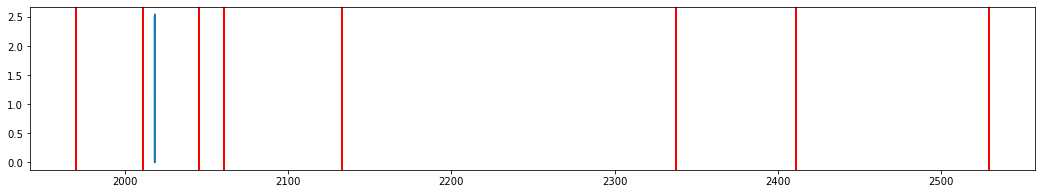

In [11]:
plot_change_points(df['sensor_00'],ts_change_loc1)

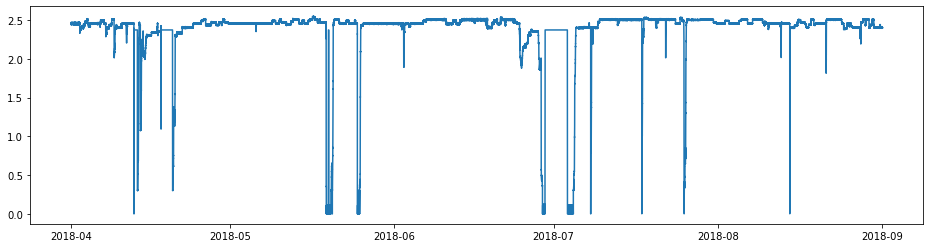

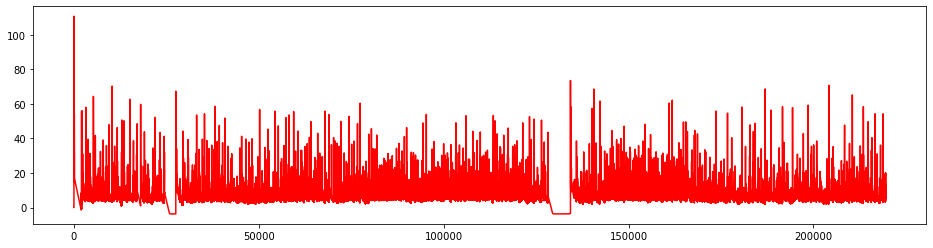

In [12]:
ts_score2 = findChangePoints(df['sensor_00'], r = 0.01,     order = 3,  smooth = 5)

In [13]:
ts_change_loc2 = pd.Series(ts_score2).nlargest(20)
ts_change_loc2 = ts_change_loc2.index

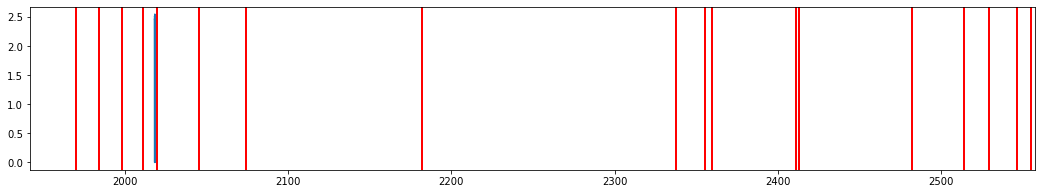

In [14]:
plot_change_points(df['sensor_00'],ts_change_loc2)

In [15]:
#!pip install ruptures
import ruptures as rpt

In [16]:
# detection
algo1 = rpt.Pelt(model="rbf").fit(df['sensor_00'])
change_location1 = algo1.predict(pen=10)
change_location1

AttributeError: 'Series' object has no attribute 'reshape'

In [ ]:
plot_change_points(df['sensor_00'],change_location1)

In [18]:
# detection
algo2 = rpt.Pelt(model="rbf").fit(df['sensor_00'])
change_location2 = algo2.predict(pen=10)
change_location2

AttributeError: 'Series' object has no attribute 'reshape'

In [20]:
plot_change_points(df['sensor_00'],change_location2)

NameError: name 'change_location2' is not defined